# Business Impact: Why Predict Customer Purchase Decisions?

In the tourism industry, competition is intense, and companies must constantly find ways to attract and retain customers. Predicting whether a customer is likely to purchase a product enables businesses to make smarter, data-driven decisions. By understanding the factors that influence a customer’s buying behavior—such as age, income, preferences, or lifestyle—tourism companies can:

Identify high-potential customers and focus marketing efforts on those most likely to convert.

Design personalized offers and promotions that align with individual customer profiles.

Improve conversion rates by targeting customers with relevant products at the right time.

Optimize marketing budgets by reducing spending on low-probability leads.

Gain competitive advantage by anticipating customer needs better than competitors.

Enhance customer satisfaction and loyalty through tailored experiences and recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv(r"C:\Users\USER\Downloads\ML SHANKAR NOTES\ML TASK\travel_dataset.csv")

In [3]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
data.shape

(4888, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [7]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer

In [9]:
#Iterative Imputer for continuous correlated columns ----
iter_imp = IterativeImputer(random_state=42)
data[['Age', 'DurationOfPitch', 'NumberOfTrips']] = iter_imp.fit_transform(
    data[['Age', 'DurationOfPitch', 'NumberOfTrips']]
)


In [10]:
#KNN Imputer for MonthlyIncome (nonlinear correlations) ----
knn_imp = KNNImputer(n_neighbors=5)
data[['MonthlyIncome']] = knn_imp.fit_transform(data[['MonthlyIncome']])


In [11]:
#Mode Imputer for discrete columns ----
data['TypeofContact'].fillna(data['TypeofContact'].mode()[0], inplace=True)
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mode()[0], inplace=True)
data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mode()[0], inplace=True)
data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mode()[0], inplace=True)

In [12]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

# Univariate Analysis¶

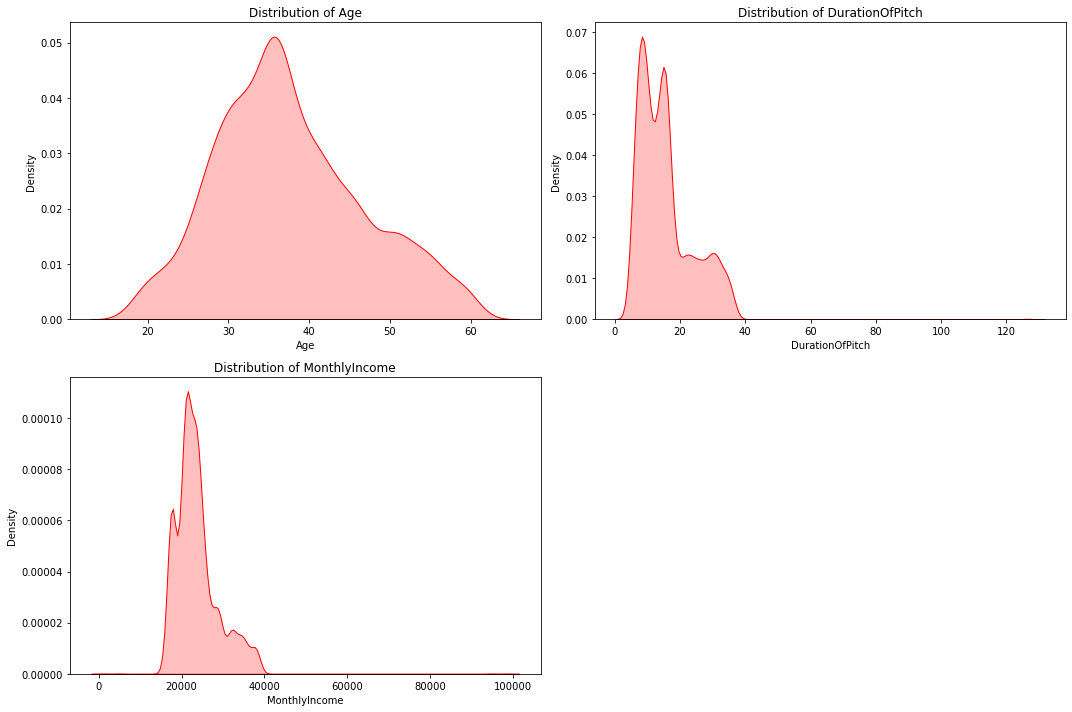

''

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the variable name matches your DataFrame
continuous_feature = data[['Age', 'DurationOfPitch',  'MonthlyIncome']]

plt.figure(figsize=(15, 10))

# Loop through each numerical column
for i in range(len(continuous_feature.columns)):
    plt.subplot(2, 2, i+1)  # 2x2 grid for 4 features
    sns.kdeplot(x=data[continuous_feature.columns[i]], shade=True, color='r')
    plt.xlabel(continuous_feature.columns[i])
    plt.ylabel('Density')
    plt.title(f'Distribution of {continuous_feature.columns[i]}')

plt.tight_layout()
plt.show()
""

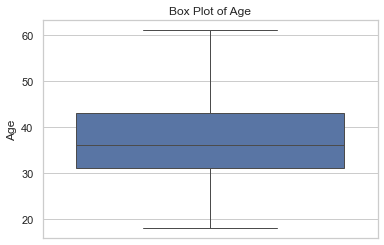

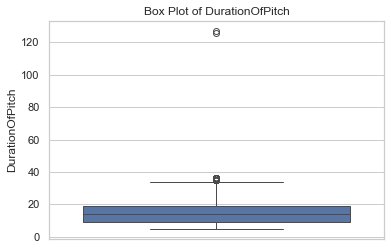

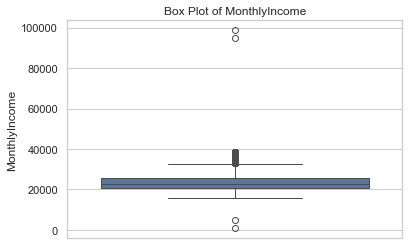

In [14]:
# Create boxplots for each numeric column
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

num_cols = ['Age', 'DurationOfPitch', 'MonthlyIncome']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


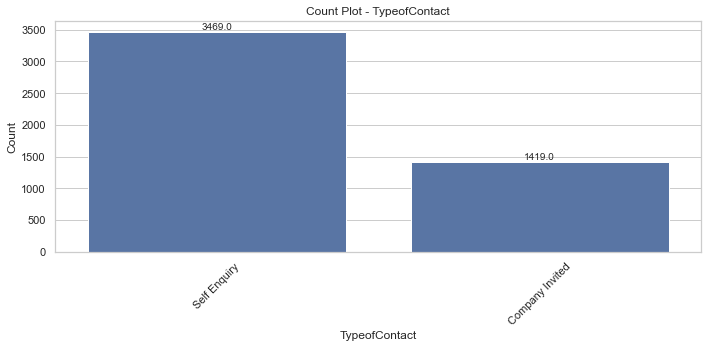

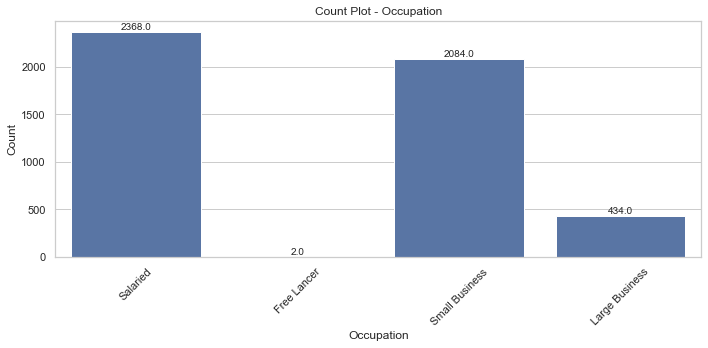

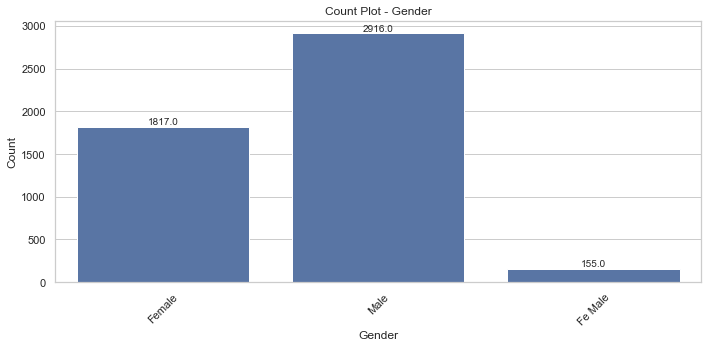

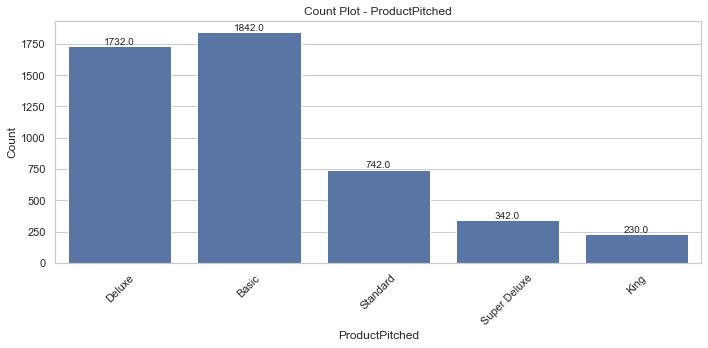

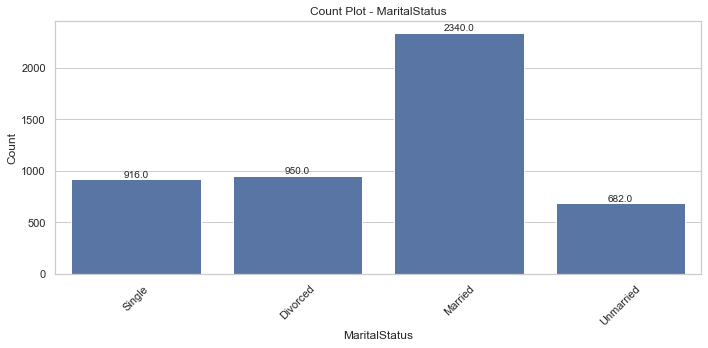

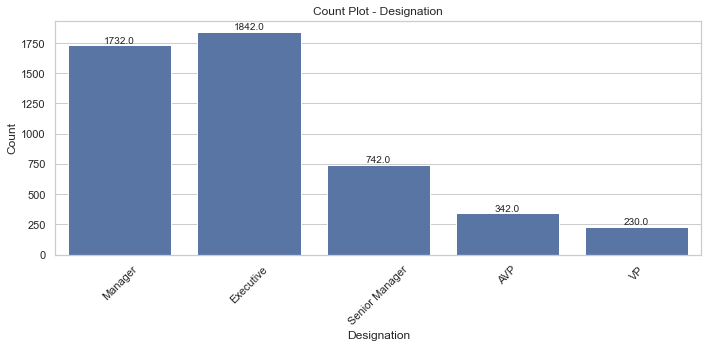

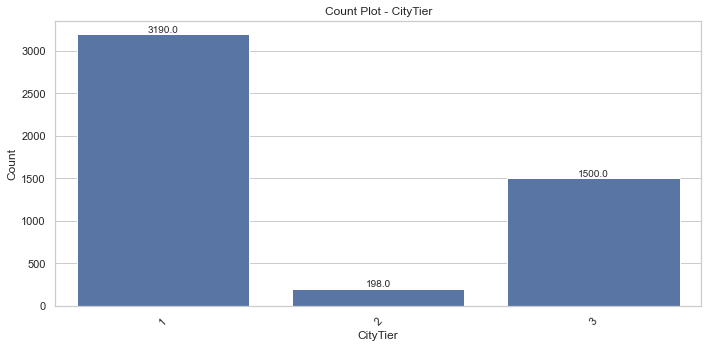

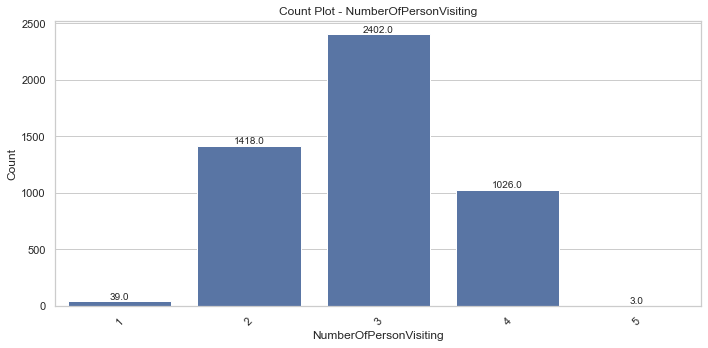

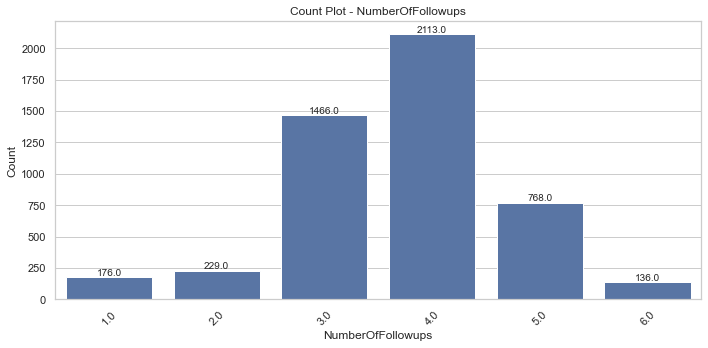

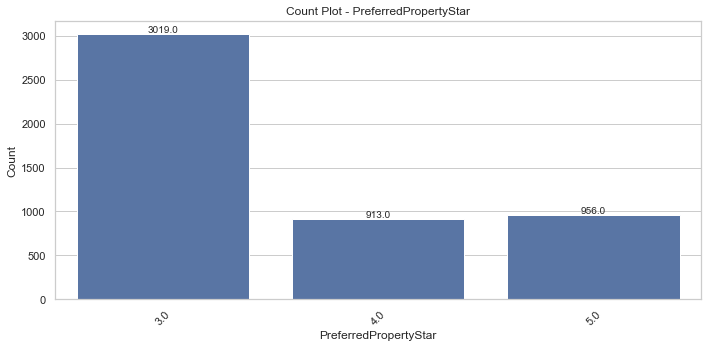

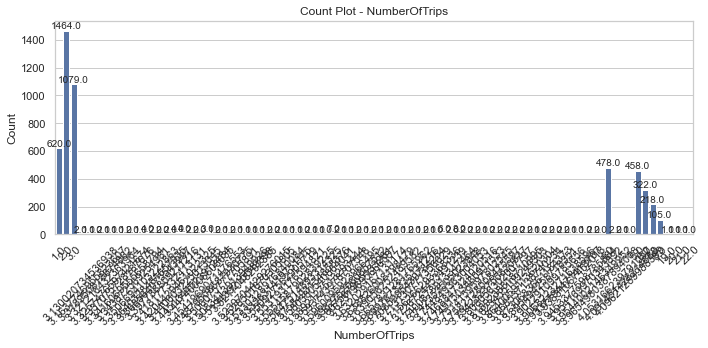

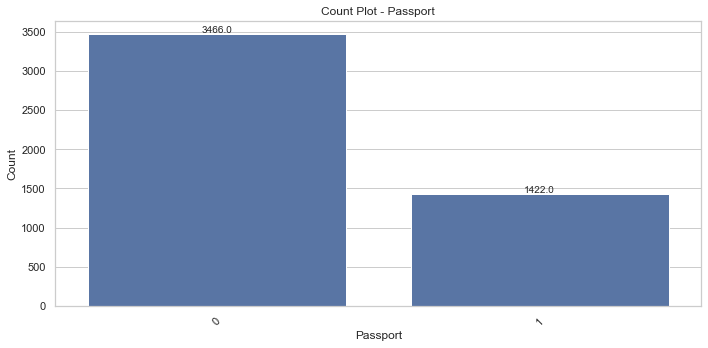

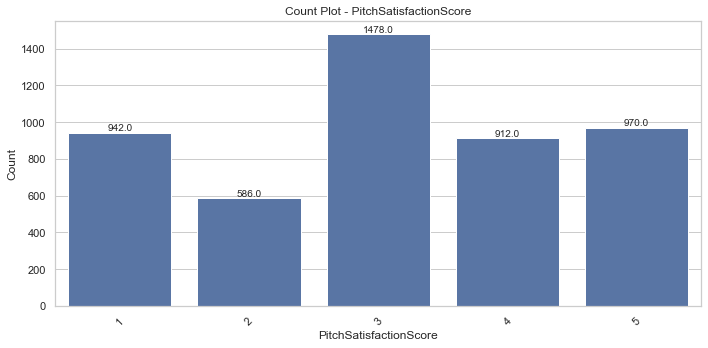

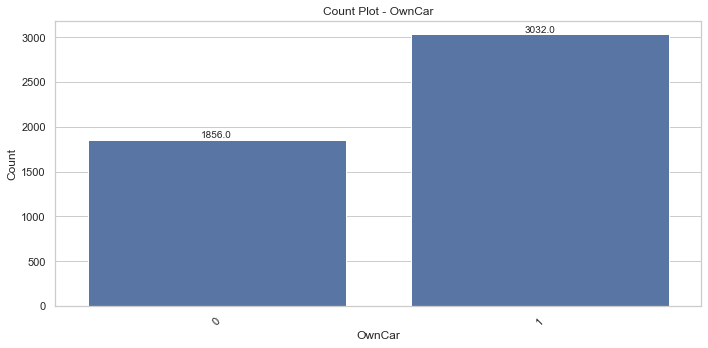

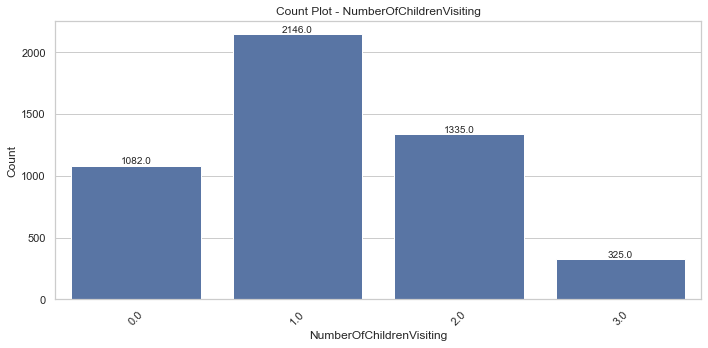

In [15]:
# List of categorical columns from clean dataset
cat_cols = [
    'TypeofContact',
    'Occupation',
    'Gender',
    'ProductPitched',
    'MaritalStatus',
    'Designation',
    'CityTier',
    'NumberOfPersonVisiting',
    'NumberOfFollowups',
    'PreferredPropertyStar',
    'NumberOfTrips',
    'Passport',
    'PitchSatisfactionScore',
    'OwnCar',
    'NumberOfChildrenVisiting'
]

# Univariate Categorical Plots with Value Counts on Bars
for col in cat_cols:
    plt.figure(figsize=(10,5))
    
    ax = sns.countplot(data=data, x=col)
    plt.title(f"Count Plot - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add value labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()


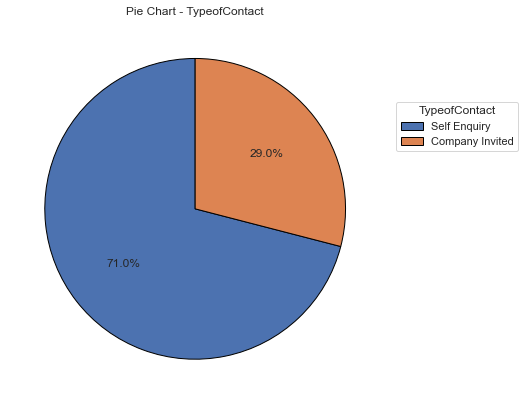


Value Counts for TypeofContact:
 TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64
--------------------------------------------------


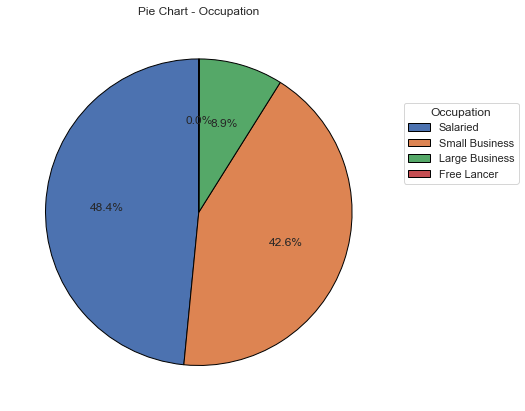


Value Counts for Occupation:
 Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
--------------------------------------------------


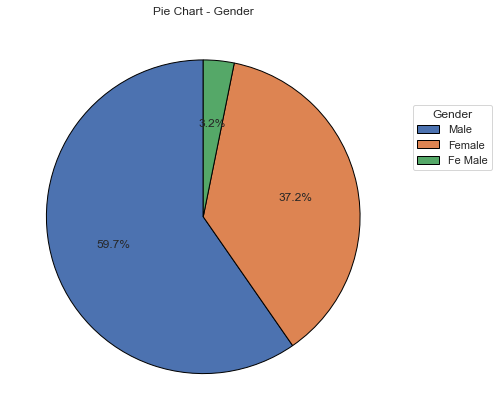


Value Counts for Gender:
 Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
--------------------------------------------------


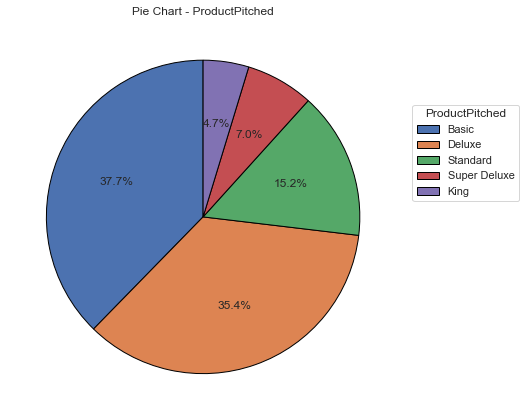


Value Counts for ProductPitched:
 ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
--------------------------------------------------


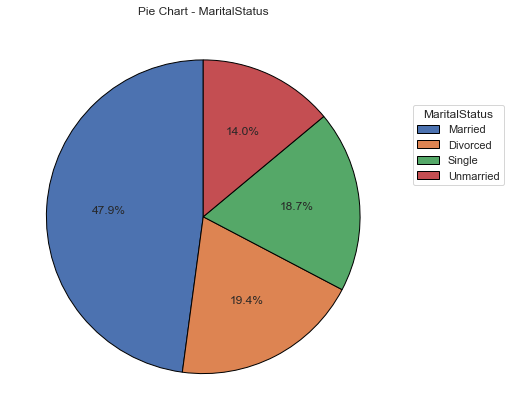


Value Counts for MaritalStatus:
 MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
--------------------------------------------------


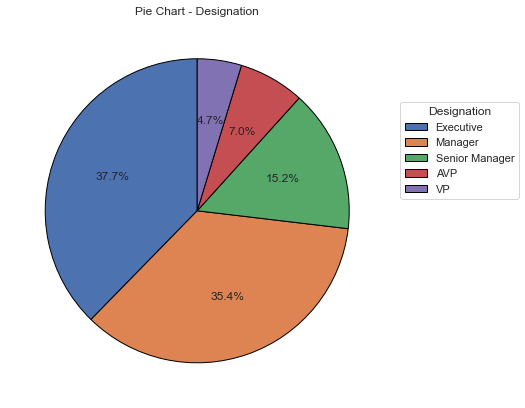


Value Counts for Designation:
 Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
--------------------------------------------------


In [16]:
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(7, 6))
    counts = data[col].value_counts()

    # Pie chart without text on slices
    plt.pie(
        counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )
    
    plt.title(f"Pie Chart - {col}")

    # Legend to show category labels
    plt.legend(counts.index, title=col, bbox_to_anchor=(1.02, 0.8), loc='upper left')

    plt.tight_layout()
    plt.show()

    print(f"\nValue Counts for {col}:\n", counts)
    print("-" * 50)


# Bivariate Analysis

In [17]:
num_continuous = ['Age', 'DurationOfPitch', 'MonthlyIncome', 'NumberOfTrips']

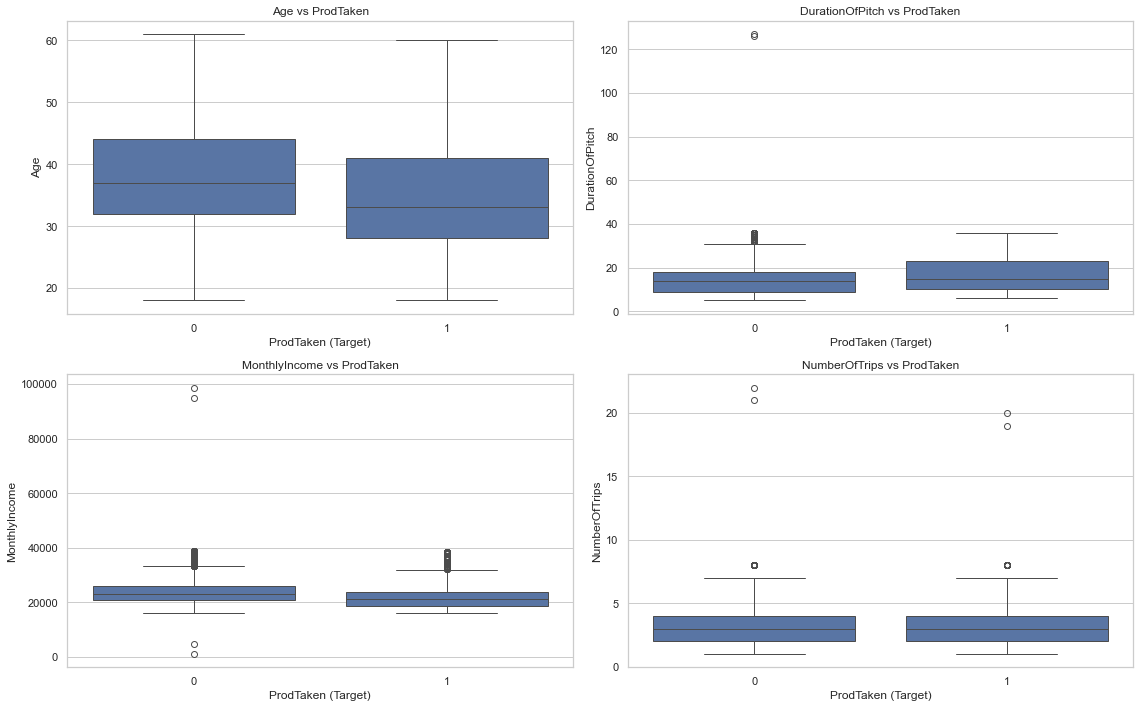

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

for i, col in enumerate(num_continuous):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='ProdTaken', y=data[col], data=data)
    plt.title(f'{col} vs ProdTaken')
    plt.xlabel("ProdTaken (Target)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# Multivariate Analysis

In [19]:
data =data.drop(columns=['CustomerID'],axis=1)

In [20]:
# Identify numeric & categorical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Columns:", num_cols)


Numerical Columns: ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']


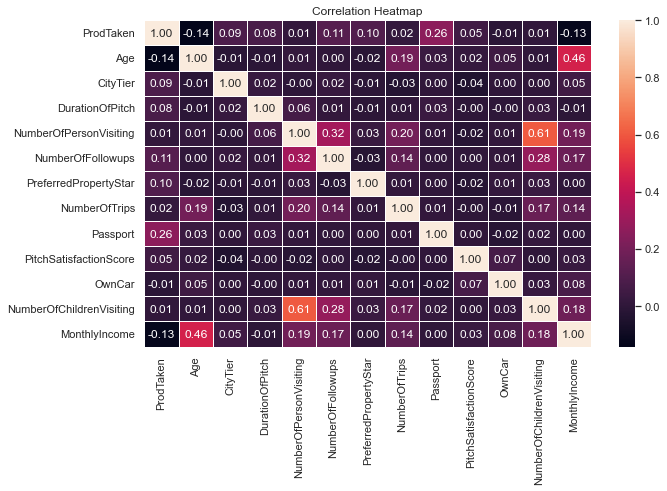

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


In [22]:
X = data.drop('ProdTaken', axis=1)   # change this
y = data['ProdTaken']


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Numerical columns
num_cols = ['Age','DurationOfPitch','MonthlyIncome']

# Categorical columns (all)
cat_cols = ['TypeofContact', 'CityTier', 'Gender', 'Occupation', 'ProductPitched', 
            'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation']

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(method='yeo-johnson'), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ]
)

# 1️⃣ Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Get transformed column names
ohe_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_cols = num_cols + list(ohe_cols)

X_transformed_df = pd.DataFrame(X_transformed, columns=all_cols)
print("Transformed Data (first 5 rows):")
print(X_transformed_df.head())

# 2️⃣ Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=16)
selector.fit(X_transformed_df, y)

# Get top features
top_features = selector.get_feature_names_out(all_cols)  # requires scikit-learn >=1.2
X_selected = selector.transform(X_transformed_df)

# Convert to DataFrame
X_selected_df = pd.DataFrame(X_selected, columns=top_features)
print("\nTop 16 Features (first 5 rows):")
print(X_selected_df.head())


Transformed Data (first 5 rows):
        Age  DurationOfPitch  MonthlyIncome  TypeofContact_Self Enquiry  \
0  0.449063        -1.726435      -0.464815                         1.0   
1  1.222327         0.102916      -0.665789                         0.0   
2  0.021426        -1.079070      -1.446228                         1.0   
3 -0.440403        -0.821085      -1.223633                         0.0   
4 -0.140943        -1.079070      -1.077236                         1.0   

   CityTier_2  CityTier_3  Gender_Female  Gender_Male  \
0         0.0         1.0            1.0          0.0   
1         0.0         0.0            0.0          1.0   
2         0.0         0.0            0.0          1.0   
3         0.0         0.0            1.0          0.0   
4         0.0         0.0            0.0          1.0   

   Occupation_Large Business  Occupation_Salaried  ...  Passport_1  \
0                        0.0                  1.0  ...         1.0   
1                        0.0     

In [33]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# X_selected_df → your features (top features)
# y → target column (ProdTaken)

# Initialize SMOTE
smote = SMOTE(random_state=42)

#  Apply SMOTE to features and target
X_res, y_res = smote.fit_resample(X_selected_df, y)

#  Check new class distribution
print("After SMOTE:")
print(pd.Series(y_res).value_counts())


After SMOTE:
ProdTaken
1    3968
0    3968
Name: count, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.model_selection import train_test_split

# X_res → balanced features from SMOTE
# y_res → balanced target from SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (6348, 16)
Test shape: (1588, 16)


In [45]:
from sklearn.metrics import accuracy_score, classification_report

def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(X_train)

        print("\n================ Train Result ==========================")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")

    else:
        pred = clf.predict(X_test)

        print("\n================= Test Result ===========================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")

        print('\nTest Classification Report:\n', classification_report(y_test, pred, digits=2))


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()



In [48]:
# knn Model training and printing train and test score
knn.fit(X_train,y_train)

# Call the function and pass dataset to check train and test score
print_score(knn,X_train,X_test,y_train,y_test,train=True)

print_score(knn,X_train,X_test,y_train,y_test,train=False)


================ Train Result ==========================
Accuracy Score: 91.68%

================= Test Result ===========================
Accuracy Score: 87.09%

Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       794
           1       0.81      0.96      0.88       794

    accuracy                           0.87      1588
   macro avg       0.88      0.87      0.87      1588
weighted avg       0.88      0.87      0.87      1588



In [49]:
# Logistic Regression

In [51]:
from sklearn.linear_model  import LogisticRegression

In [52]:
log = LogisticRegression()


In [53]:
# logistic Model training and printing train and test score
log.fit(X_train,y_train)

# Call the function and pass dataset to check train and test score
print_score(log,X_train,X_test,y_train,y_test,train=True)

print_score(log,X_train,X_test,y_train,y_test,train=False)


================ Train Result ==========================
Accuracy Score: 73.09%

================= Test Result ===========================
Accuracy Score: 74.75%

Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       794
           1       0.74      0.77      0.75       794

    accuracy                           0.75      1588
   macro avg       0.75      0.75      0.75      1588
weighted avg       0.75      0.75      0.75      1588



In [54]:
from sklearn.svm import SVC
svc = SVC()

In [55]:
# svc Model training and printing train and test score
svc.fit(X_train,y_train)

# Call the function and pass dataset to check train and test score
print_score(svc,X_train,X_test,y_train,y_test,train=True)

print_score(svc,X_train,X_test,y_train,y_test,train=False)


================ Train Result ==========================
Accuracy Score: 81.57%

================= Test Result ===========================
Accuracy Score: 79.41%

Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       794
           1       0.79      0.80      0.79       794

    accuracy                           0.79      1588
   macro avg       0.79      0.79      0.79      1588
weighted avg       0.79      0.79      0.79      1588



In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [57]:
best_nb = BernoulliNB(alpha=10, binarize=0.5)

In [58]:
# svc Model training and printing train and test score
best_nb.fit(X_train,y_train)

# Call the function and pass dataset to check train and test score
print_score(best_nb,X_train,X_test,y_train,y_test,train=True)

print_score(best_nb,X_train,X_test,y_train,y_test,train=False)


================ Train Result ==========================
Accuracy Score: 68.19%

================= Test Result ===========================
Accuracy Score: 68.77%

Test Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       794
           1       0.68      0.70      0.69       794

    accuracy                           0.69      1588
   macro avg       0.69      0.69      0.69      1588
weighted avg       0.69      0.69      0.69      1588



In [61]:
from xgboost import XGBClassifier

# XGBoost Model
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train model
xgb.fit(X_train, y_train)

# Print Train Score
print_score(xgb, X_train, X_test, y_train, y_test, train=True)

# Print Test Score
print_score(xgb, X_train, X_test, y_train, y_test, train=False)



================ Train Result ==========================
Accuracy Score: 90.08%

================= Test Result ===========================
Accuracy Score: 87.34%

Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       794
           1       0.88      0.87      0.87       794

    accuracy                           0.87      1588
   macro avg       0.87      0.87      0.87      1588
weighted avg       0.87      0.87      0.87      1588



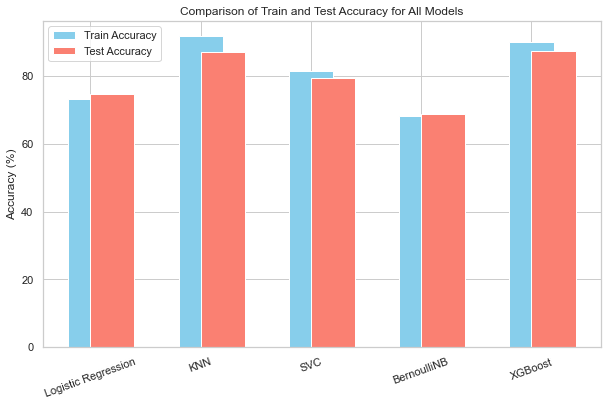

In [64]:
# Model names and accuracies
models = ['Logistic Regression', 'KNN', 'SVC', 'BernoulliNB', 'XGBoost']
train_acc = [73.09, 91.68, 81.57, 68.19, 90.08]
test_acc = [74.75, 87.09, 79.41, 68.77, 87.34]

# Bar chart
x = range(len(models))
plt.figure(figsize=(10,6))
plt.bar(x, train_acc, width=0.4, label='Train Accuracy', color='skyblue', align='center')
plt.bar(x, test_acc, width=0.4, label='Test Accuracy', color='salmon', align='edge')
plt.xticks(x, models, rotation=20)
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Train and Test Accuracy for All Models')
plt.legend()
plt.show()


In [62]:
import pickle

with open("xgb_model.pkl", "wb") as file:
    pickle.dump(xgb, file)

print("XGBoost model saved successfully (pickle)!")


XGBoost model saved successfully (pickle)!


In [63]:
import pickle

with open("xgb_model.pkl", "rb") as file:
    loaded_xgb = pickle.load(file)

loaded_xgb.predict(X_test)


array([1, 0, 0, ..., 1, 0, 0])